# Interpreting ResNet Model With LIME

This notebook loads the pretrained ResNet model given by [PaddlePaddle Models](https://github.com/PaddlePaddle/models/tree/release/1.7) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using LIME algorithm, specifically the `LIMECVInterpreter` class.

If you have't done so, please first download the pretrained ResNet50 model from [this link](http://paddle-imagenet-models-name.bj.bcebos.com/ResNet50_pretrained.tar). More pretrained models can be found [here](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification).

In [1]:
import paddle.fluid as fluid
import paddle
import numpy as np
import sys
from PIL import Image

sys.path.append('..')
import interpretdl as it
from interpretdl.data_processor.readers import preprocess_image, read_image
from assets.resnet import ResNet50

Define the `paddle_model` function that takes in images and return prediction probabilities. `ResNet50` is borrowed from PaddlePaddle image  classification [models](https://github.com/PaddlePaddle/models/tree/release/1.7/PaddleCV/image_classification/models).

In [2]:
def paddle_model(data):
    class_num = 1000
    model = ResNet50()
    logits = model.net(input=data, class_dim=class_num)
    probs = fluid.layers.softmax(logits, axis=-1)
    return probs

Initialize the `LIMECVInterpreter`. 

In [3]:
MODEL_PATH = "../../ResNet50_pretrained"

lime = it.LIMECVInterpreter(paddle_model, MODEL_PATH)

Before interpreting the image, we first take a look at the original image.

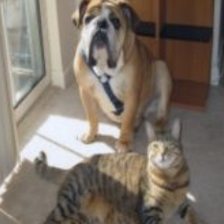

In [4]:
img_path = 'assets/catdog.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let LIME method help us `interpret` the image with respect to the predicted label. The most important parts are painted green.

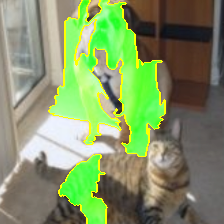

In [5]:
lime_weights = lime.interpret(
    'assets/catdog.png',
    num_samples=2000,
    batch_size=50,
    visual=True,
    save_path=None)

What if we `interpret` the image with respect to label "tiger cat"?

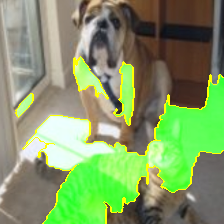

In [6]:
lime_weights = lime.interpret(
    img_path,
    num_samples=2000,
    batch_size=50,
    interpret_class=[282],
    visual=True,
    save_path=None)